# FACIAL RECOGNITION SYSTEM USING DEEP LEARNING

## 1.0 Setup 

## 1.1 Installing our Dependencies

In [1]:
#!pip3 install tensorflow opencv-python  --break-system-packages

## 1.2 Import Dependencies

In [2]:
#  import our dependencies 
import cv2
import os
import random
import numpy as np
from matplotlib import pyplot as plt

#import tensorflow functional - Api
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer , Conv2D , Dense , MaxPooling2D , Input , Flatten
import tensorflow as tf

## 1.3 Set GPU Growth 

In [3]:
# limiting the amount of ram tensorflow can use
gpus  = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu , True)


 ## 1.4  Create the folder structure

In [4]:
# setting the path
POS_PATH = os.path.join('data' , 'positive')
NEG_PATH = os.path.join('data' , 'negative')
ANC_PATH = os.path.join('data' , 'anchor')

In [5]:
# make new directories
# os.makedirs(POS_PATH)
# os.makedirs(NEG_PATH)
# os.makedirs(ANC_PATH)

## COLLECT POSITIVE AND ANCHOR IMAGES

In [6]:
#2.1 UNTAR LABELLED FACES IN THE WILD DATASET

In [7]:
#unzip the image files
# !tar -xf ifw.tgz

In [8]:
for directory in os.listdir('lfw'):
    for file in os.listdir(os.path.join('lfw', directory)):
        EX_PATH = os.path.join('lfw', directory, file)
        NEW_PATH = os.path.join(NEG_PATH, file)
        os.replace(EX_PATH, NEW_PATH)

In [9]:
#import uuid library to generate unique image name
import uuid

In [10]:
#Establish a connection to the webcam
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret , frame = cap.read()

    #cut down frame by 700 by 1000
    frame = frame[:700 , :1000 ,:]

    #collect anchors
    if cv2.waitKey(1) & 0xFF == ord('a'):
         #create unique file path
         imgname = os.path.join(ANC_PATH , '{}.jpg'.format(uuid.uuid1()))
         #write out anchor image
         cv2.imwrite(imgname ,frame)
    #collect positives
     
    if cv2.waitKey(1) & 0xFF == ord('p'):
         imgname = os.path.join(POS_PATH , '{}.jpg'.format(uuid.uuid1()))
         #write out anchor image
         cv2.imwrite(imgname ,frame)
    
    #show image back to the screen
    cv2.imshow('Image Collection' , frame)


    #Breaking gracefully
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


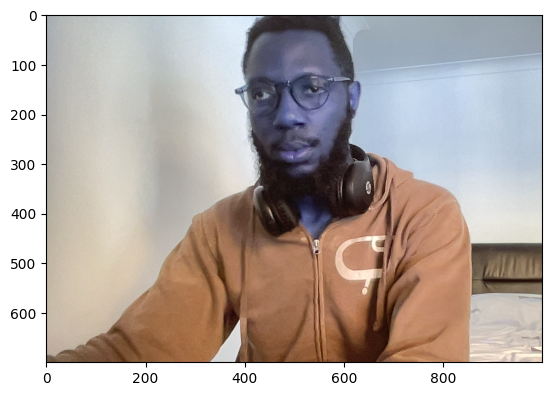

In [11]:
plt.imshow(frame)

In [12]:
frame.shape

(700, 1000, 3)

In [13]:
frame[:250 , :250 ,:].shape

(250, 250, 3)

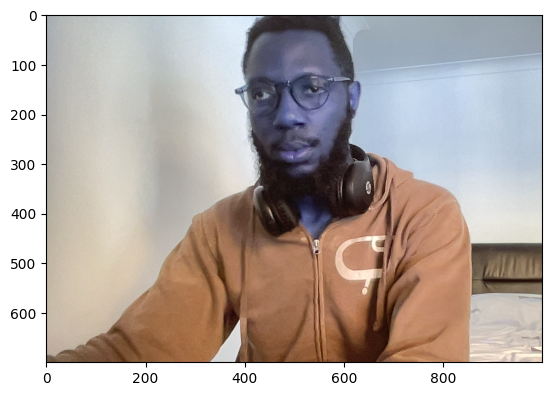

In [14]:
plt.imshow(frame[:700 , :1000 ,:])